In [1]:
#importing modules
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pl

In [2]:
#importing datasets
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [4]:
#removing nonsensical values as pixel height or screen width cannot be 0
df_train.drop(df_train.index[df_train["px_height"]==0], inplace=True)
df_train.drop(df_train.index[df_train["sc_w"]==0], inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1819 non-null   int64  
 1   blue           1819 non-null   int64  
 2   clock_speed    1819 non-null   float64
 3   dual_sim       1819 non-null   int64  
 4   fc             1819 non-null   int64  
 5   four_g         1819 non-null   int64  
 6   int_memory     1819 non-null   int64  
 7   m_dep          1819 non-null   float64
 8   mobile_wt      1819 non-null   int64  
 9   n_cores        1819 non-null   int64  
 10  pc             1819 non-null   int64  
 11  px_height      1819 non-null   int64  
 12  px_width       1819 non-null   int64  
 13  ram            1819 non-null   int64  
 14  sc_h           1819 non-null   int64  
 15  sc_w           1819 non-null   int64  
 16  talk_time      1819 non-null   int64  
 17  three_g        1819 non-null   int64  
 18  touch_sc

In [5]:
#mean of battery power
print(df_train["battery_power"].mean())
#max value of battery power
print(df_train["battery_power"].max())
#min value of battery power
print(df_train["battery_power"].min())
#correlation matrix
print(df_train.corr())

1238.0313358988456
1998
501
               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.028427     0.002404 -0.046804  0.027073   
blue                0.028427  1.000000     0.019489  0.019176 -0.002040   
clock_speed         0.002404  0.019489     1.000000 -0.007587 -0.005444   
dual_sim           -0.046804  0.019176    -0.007587  1.000000 -0.026693   
fc                  0.027073 -0.002040    -0.005444 -0.026693  1.000000   
four_g              0.019110  0.010108    -0.037220 -0.007614 -0.017502   
int_memory         -0.006117  0.043189     0.005311 -0.019762 -0.032046   
m_dep               0.034156  0.015424    -0.011987 -0.015795 -0.002887   
mobile_wt           0.013188 -0.027056    -0.001745 -0.003877  0.032649   
n_cores            -0.027528  0.031019    -0.015042 -0.016586 -0.021467   
pc                  0.025015 -0.014135    -0.008417 -0.023793  0.645880   
px_height           0.014913 -0.009228    -0.007822 -0.027274 -0.001558 

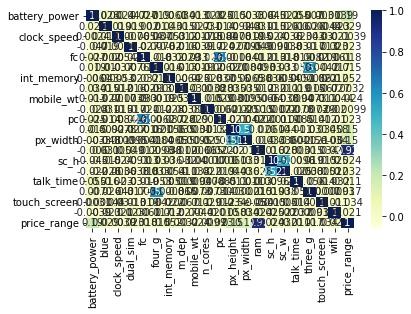

In [6]:
#correlation heatmap
hm = sb.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
pl.show()

## Data cleaning for Price Range

In [7]:
#dropping some columns
df_pricerange = df_train.drop(["clock_speed", "m_dep", "n_cores", "mobile_wt"], axis=1)
df_pricerange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  1819 non-null   int64
 1   blue           1819 non-null   int64
 2   dual_sim       1819 non-null   int64
 3   fc             1819 non-null   int64
 4   four_g         1819 non-null   int64
 5   int_memory     1819 non-null   int64
 6   pc             1819 non-null   int64
 7   px_height      1819 non-null   int64
 8   px_width       1819 non-null   int64
 9   ram            1819 non-null   int64
 10  sc_h           1819 non-null   int64
 11  sc_w           1819 non-null   int64
 12  talk_time      1819 non-null   int64
 13  three_g        1819 non-null   int64
 14  touch_screen   1819 non-null   int64
 15  wifi           1819 non-null   int64
 16  price_range    1819 non-null   int64
dtypes: int64(17)
memory usage: 255.8 KB


In [8]:
#saving dataset for price range
df_pricerange.to_csv("..\\data\\PriceRange_train.csv", index=False)

## Data cleaning for Battery Power

In [9]:
#dropping some columns
df_battery = df_train.drop(["int_memory", "m_dep", "mobile_wt", "px_height", "px_width", "ram", "wifi"], axis=1)
df_battery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1819 non-null   int64  
 1   blue           1819 non-null   int64  
 2   clock_speed    1819 non-null   float64
 3   dual_sim       1819 non-null   int64  
 4   fc             1819 non-null   int64  
 5   four_g         1819 non-null   int64  
 6   n_cores        1819 non-null   int64  
 7   pc             1819 non-null   int64  
 8   sc_h           1819 non-null   int64  
 9   sc_w           1819 non-null   int64  
 10  talk_time      1819 non-null   int64  
 11  three_g        1819 non-null   int64  
 12  touch_screen   1819 non-null   int64  
 13  price_range    1819 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 213.2 KB


In [10]:
#saving dataset for battery power
df_battery.to_csv("..\\data\\BatteryPower_train.csv", index=False)